# Comparison between variant annotation databases

Created: **31/07/18**  
Last modified: **01/08/18**

**Goal:** ...  
This notebook is divided in ? parts:

* **1. Bla**: Bla

**Refs:**
* `annotating.ipynb` [Pierre]
* `custom_tools.R` [Pierre](./annotating.ipynb)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CIViC" data-toc-modified-id="CIViC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CIViC</a></span><ul class="toc-item"><li><span><a href="#Join-database-with-impact" data-toc-modified-id="Join-database-with-impact-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Join database with impact</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Cancer-Genome-Interpreter" data-toc-modified-id="Cancer-Genome-Interpreter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cancer Genome Interpreter</a></span></li><li><span><a href="#My-Cancer-Genome" data-toc-modified-id="My-Cancer-Genome-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>My Cancer Genome</a></span></li></ul></div>

***

<font color='red'> Please make sure to run the script `get_data.sh` in `data/other_databases` to download the different databases used in the rest of the notebook.</font>

In [25]:
source("../../../src/utils/custom_tools.R")
setup_environment()

In [26]:
impact <- get_cleaned_impact("../../../data")
impact <- add_features("../../../data", impact, oncokb = TRUE)

Warning message in `[<-.data.frame`(`*tmp*`, , c("is_a_hotspot", "is_a_3d_hotspot", :
“replacement element 1 has 248365 rows to replace 248350 rows”Warning message in `[<-.data.frame`(`*tmp*`, , c("is_a_hotspot", "is_a_3d_hotspot", :
“replacement element 2 has 248365 rows to replace 248350 rows”Warning message in `[<-.data.frame`(`*tmp*`, , c("is_a_hotspot", "is_a_3d_hotspot", :
“replacement element 3 has 248365 rows to replace 248350 rows”

We will study different databases available online and compare them with OncoKB:
* [CIViC](https://civicdb.org/)

TODO:
* Read CIViC paper page 1 par on the right.
* Read CancerGenomeInterpreter paper page 1 par on the right. 2 first lines 2nd page
* https://github.com/seandavi/awesome-cancer-variant-databases

## CIViC

**Website:** https://civicdb.org/  
**Article:** https://www.nature.com/articles/ng.3774, published in Nature in January 2017  
**Author:** MIT (Massachusettes Institute of Technology)  
**Data:** downloaded from https://civicdb.org/releases under "Variant Summaries", 01/07/18 version

*Pierre - "It's a crowdsourcing OncoKB."*

From the article and https://civicdb.org/faq:
* CIViC is an community expert-crowdsourced knowledgebase for clinical interpretation of variants in cancer.
* It describes the therapeutic, prognostic, diagnosic and predisposing relevance of inherited and somatic variants of all types.
* Present itself as more open and transparent that the concurrency.
* National team of experts collaborating remotely within a centralized curation interface. Agreement between at least two independant contributors (and at least one must be an expert editor) before acceptance of new evidence or revisions of existing content. Validated curators can add a variant description if there is evidence link to cancer with some clinical relevance
* Scoring system of the variants.
* All variant types supported as well as all variants origine (somatic mutation, germline mutation and germline polymorphism).
* 1,678 curated interpretations of clinical relevance for **713 variants** affecting **283 genes**.

### Join database with impact

In [27]:
civic <- read.table("../../../data/other_databases/CIViC_01-Jul-2018-VariantSummaries.tsv",
                    sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE, quote = "")

In [28]:
nrow(civic)
length(unique(civic$gene))

[1] 1885

[1] 353

In [29]:
colnames(civic)

[1] "variant_id"                 "variant_civic_url"         
 [3] "gene"                       "entrez_id"                 
 [5] "variant"                    "summary"                   
 [7] "variant_groups"             "chromosome"                
 [9] "start"                      "stop"                      
[11] "reference_bases"            "variant_bases"             
[13] "representative_transcript"  "ensembl_version"           
[15] "reference_build"            "chromosome2"               
[17] "start2"                     "stop2"                     
[19] "representative_transcript2" "variant_types"             
[21] "hgvs_expressions"           "last_review_date"          
[23] "civic_actionability_score"

In [30]:
interesting_columns <- c(
"gene",
"variant",
"chromosome",
"start",
"stop",
"reference_bases",
"variant_bases",
"representative_transcript",
"ensembl_version",
"reference_build",
"variant_types",
"hgvs_expressions",
"civic_actionability_score")

In [31]:
head(civic[, interesting_columns], 10)

gene,variant,chromosome,start,stop,reference_bases,variant_bases,representative_transcript,ensembl_version,reference_build,variant_types,hgvs_expressions,civic_actionability_score
ABL1,BCR-ABL,22,23522397,23632600,,,ENST00000305877.8,75,GRCh37,transcript_fusion,,238.0
ABL1,BCR-ABL T334I,9,133748283,133748283,C,T,ENST00000372348.2,75,GRCh37,"transcript_fusion,missense_variant","NM_007313.2:c.1001C>T,NP_005148.2:p.Thr315Ile,ENST00000372348.2:c.1001C>T,NC_000009.11:g.133748283C>T",54.0
ABL1,BCR-ABL E255K,9,133738363,133738363,G,A,ENST00000318560.5,75,GRCh37,"transcript_fusion,missense_variant","NC_000009.11:g.133738363G>A,NM_005157.5:c.763G>A,NP_005148.2:p.Glu255Lys,ENST00000318560.5:c.763G>A",17.0
AKT1,E17K,14,105246551,105246551,C,T,ENST00000407796.2,75,GRCh37,missense_variant,"NC_000014.8:g.105246551C>T,NM_001014432.1:c.49G>A,NP_001014432.1:p.Glu17Lys,ENST00000407796.2:c.49G>A",32.5
ALK,EML4-ALK,2,42396490,42522656,,,ENST00000318522.5,75,GRCh37,transcript_fusion,,48.0
ALK,EML4-ALK C1156Y,2,29445258,29445258,C,T,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3467G>A,NC_000002.11:g.29445258C>T,NM_004304.4:c.3467G>A,NP_004295.2:p.Cys1156Tyr",19.0
ALK,EML4-ALK L1196M,2,29443631,29443631,G,T,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3586C>A,NC_000002.11:g.29443631G>T,NM_004304.4:c.3586C>A,NP_004295.2:p.Leu1196Met",31.0
ALK,F1174L,2,29443695,29443695,G,T,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3522C>A,NP_004295.2:p.Phe1174Leu,NC_000002.11:g.29443695G>T,ENST00000389048.3:c.3522C>A",33.5
ALK,R1275Q,2,29432664,29432664,C,T,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3824G>A,NP_004295.2:p.Arg1275Gln,NC_000002.11:g.29432664C>T,ENST00000389048.3:c.3824G>A",23.0
ARAF,S214C,X,47426121,47426121,C,G,ENST00000377045.4,75,GRCh37,missense_variant,"NC_000023.10:g.47426121C>G,NM_001654.4:c.641C>G,NP_001645.1:p.Ser214Cys,ENST00000377045.4:c.641C>G",11.0


We will join the database using `join_key = chromosome`\_`start`_`reference_bases`_`variant_bases`, even though a lot of keys will be invalid no better alternative was found.

In [32]:
# creating the key
civic$join_key <- paste(civic$chromosome, civic$start, civic$reference_bases, civic$variant_bases, sep = "_")
civic$join_key[civic$chromosome == "" |
               civic$start == "" |
               (civic$reference_bases == "" & civic$variant_bases   == "")] <- "no_key"

In [33]:
nrow(civic[civic$join_key == "no_key",])
nrow(civic)

# delete the rows where we couldn't compute a key
civic <- civic[civic$join_key != "no_key",]

[1] 1082

[1] 1885

In [34]:
# check the unicity of `join_key`
length(unique(civic$join_key))
nrow(civic)

repeated_key <- civic %>% group_by(join_key) %>% filter(n() > 1)
repeated_key[order(repeated_key$join_key), interesting_columns]

[1] 797

[1] 803

gene,variant,chromosome,start,stop,reference_bases,variant_bases,representative_transcript,ensembl_version,reference_build,variant_types,hgvs_expressions,civic_actionability_score
FLT3,TKD MUTATION,13,28592642,28592642,C,A,ENST00000241453.7,75,GRCh37,nonsynonymous_variant,NC_000013.10:g.28592642C>A,120.0
FLT3,D835,13,28592642,28592642,C,A,ENST00000241453.7,75,GRCh37,protein_altering_variant,NC_000013.10:g.28592642C>A,46.0
ERBB2,P780INS,17,37881011,37881012,,GGCTCCCCA,ENST00000269571.5,75,GRCh37,inframe_insertion,"ENST00000269571.5:c.2340_2341insGGCTCCCCA,NC_000017.10:g.37881011_37881012insGGCTCCCCA",12.5
ERBB2,G778_P780DUP,17,37881011,37881012,,GGCTCCCCA,ENST00000269571.5,75,GRCh37,inframe_insertion,NM_004448.3:c.2332_2340dupGGCTCCCCA,15.0
ALK,EML4-ALK G1269A,2,29432682,29432682,C,G,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3806G>C,NC_000002.11:g.29432682C>G,NM_004304.4:c.3806G>C,NP_004295.2:p.Gly1269Ala",17.5
ALK,ALK FUSION G1269A,2,29432682,29432682,C,G,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3806G>C,NC_000002.11:g.29432682C>G,NM_004304.4:c.3806G>C,NP_004295.2:p.Gly1269Ala",10.0
ALK,F1245C,2,29436859,29436859,A,C,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3734T>G,NP_004295.2:p.Phe1245Cys,NC_000002.11:g.29436859A>C,ENST00000389048.3:c.3734T>G",10.5
ALK,ALK FUSION F1245C,2,29436859,29436859,A,C,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","NM_004304.4:c.3734T>G,NP_004295.2:p.Phe1245Cys,NC_000002.11:g.29436859A>C,ENST00000389048.3:c.3734T>G",14.5
VHL,P59fs (c.173_174insC),3,10183704,10183705,,C,ENST00000256474.2,75,GRCh37,frameshift_truncation,"ENST00000256474.2:c.173_174insC,NP_000542.1:p.Pro59AlafsTer73,NM_000551.3:c.173_174insC,NC_000003.11:g.10183704_10183705insC",7.5
VHL,R58fs (c.173_174insC),3,10183704,10183705,,C,ENST00000256474.2,75,GRCh37,frameshift_variant,ENST00000256474.2:c.173_174insC,0.0


In [35]:
# delete the repeated keys
civic <- civic[! civic$join_key %in% repeated_key$join_key,]
nrow(civic)

[1] 791

In [36]:
impact$is_in_civic <- "no"
impact$is_in_civic[impact$mut_key %in% civic$join_key] <- "yes"

### Results


    no    yes 
235490  12860 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                524                 384               47541               16233 
Predicted Oncogenic             Unknown 
               2840              180828 

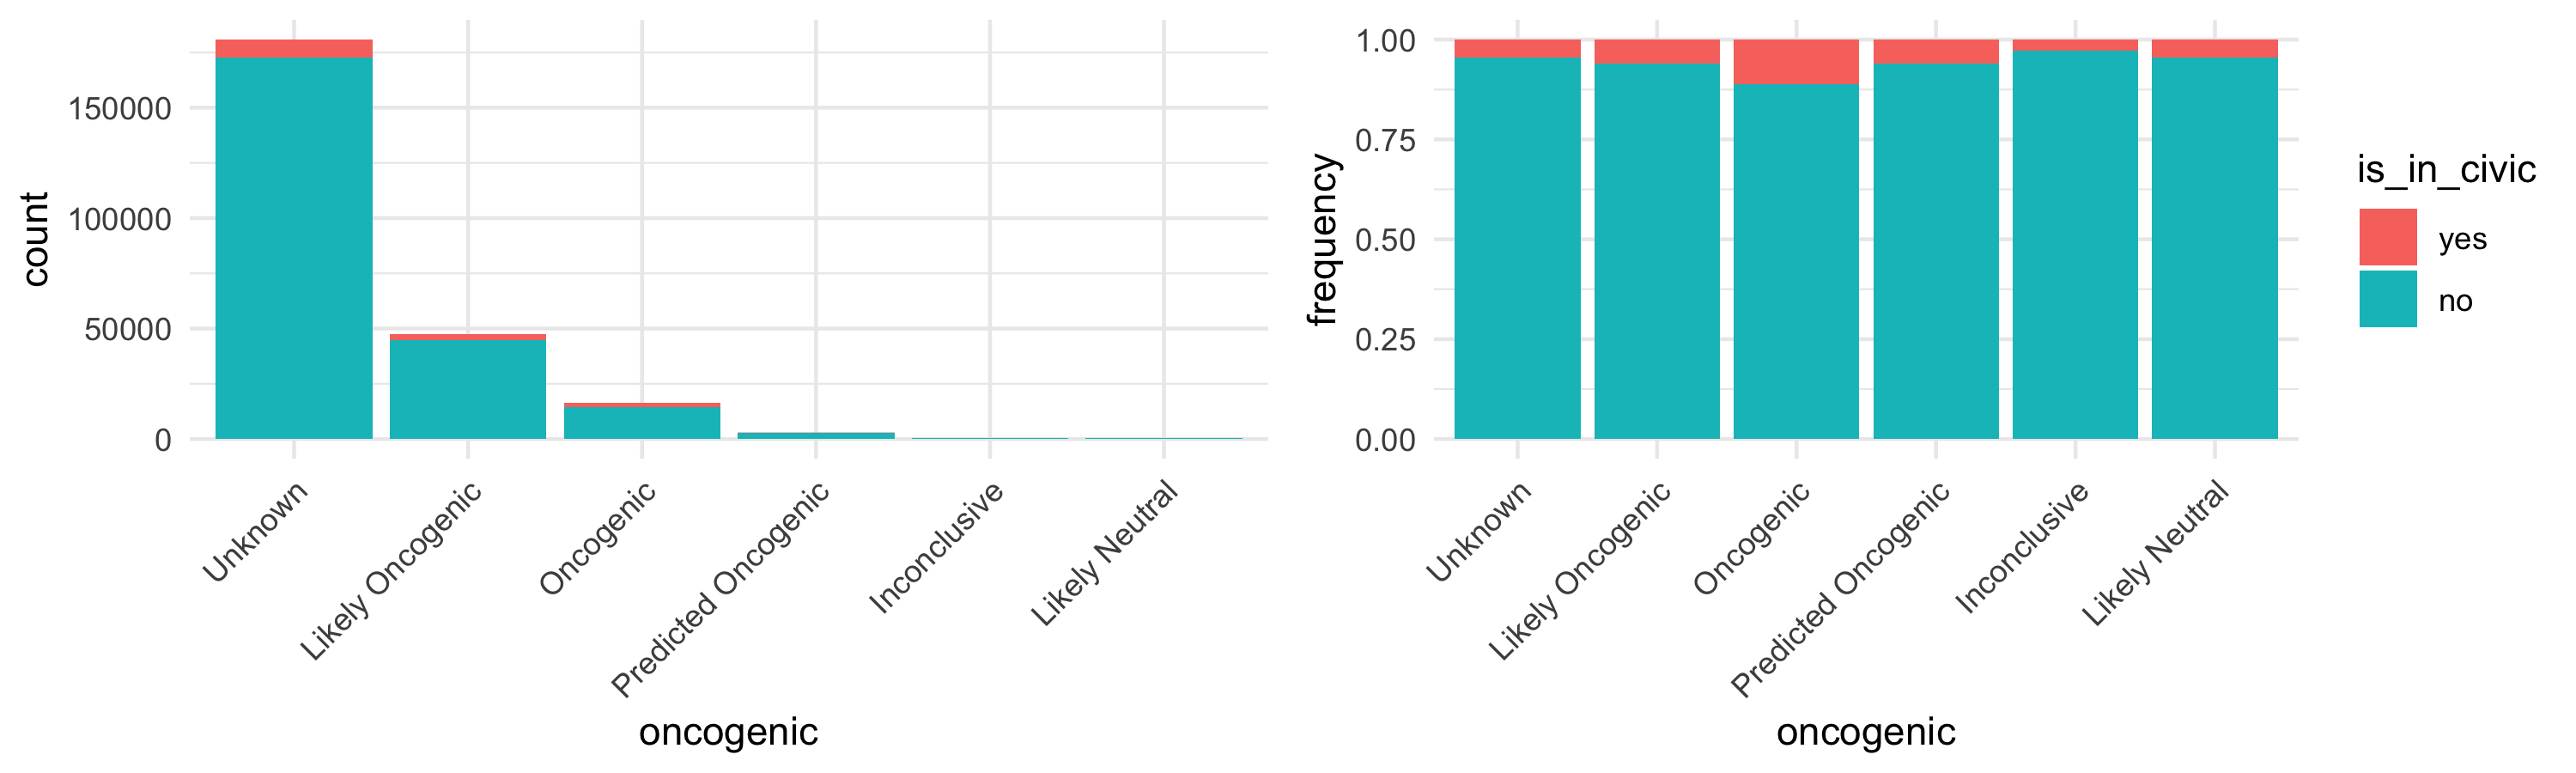

In [41]:
table(impact$is_in_civic)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic", "is_in_civic")

## Cancer Genome Interpreter

**Website:** https://www.cancergenomeinterpreter.org/home  
**Article:** https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5875005/, published in Genome Med. in March 2018  
**Author:** Tamborero et al.  
**Data:** downloaded from https://www.cancergenomeinterpreter.org/mutations, 01/17/18 version

*Pierre - "It's OncoKB with a...."*

From the article and https://www.cancergenomeinterpreter.org/faq:


* Designed to support the identification of tumor alterations that drive the disease and detect those that may be therapeutically actionable.
* CGI relies on existing knowledge collected from several resources and on computational methods that annotate the alterations in a tumor according to distinct levels of evidence.
* It identifies known driver alterations and annotates and classifies the remaining variants of unknown significance. Finally, alterations that are biomarkers of drug effect are identified according to current evidences.
* Alterations that are clinically or experimentally validated to drive tumor phenotypes –previously culled from public sources-- are identified by the CGI, whereas the effect of the remaining alterations of uncertain significance are predicted using in silico approaches, such as OncodriveMUT (for mutations).

Data downloaded from https://www.cancergenomeinterpreter.org/mutations, 01/17/18 version.

In [90]:
cgi <- read.table("data/other_databases/catalog_of_validated_oncogenic_mutations.tsv",
                  sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

In [91]:
head(cgi)

gene,gdna,protein,transcript,info,context,cancer_acronym,source,reference
ABCB4,chr7:g.87053221C>T,.,ENST00000265723,CSQN=SpliceDonorSNV;C2=SpliceDonorOfExon17_At_chr7:87053221;aliases=ENSP00000265723;source=Ensembl,germline,HC-PR,ClinVar,Clinvar:NM_018849.2(ABCB4):c.2211+1G>A AND Progressive familial intrahepatic cholestasis 3
ABL1,chr9:g.133738306G>A,p.E236K,ENST00000318560,CSQN=Missense;codon_pos=133738306-133738307-133738308;ref_codon_seq=GAG;aliases=ENSP00000323315;source=Ensembl,somatic,CML,DoCM,PMID:21562040
ABL1,chr9:g.133738309A>G,p.M237V,ENST00000318560,"CSQN=Missense;reference_codon=ATG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738309_133738311delATGinsGTA,chr9:g.133738309_133738311delATGinsGTC,chr9:g.133738309_133738311delATGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738325T>C,p.I242T,ENST00000318560,"CSQN=Missense;reference_codon=ATC;candidate_codons=ACA,ACG,ACT,ACC;candidate_mnv_variants=chr9:g.133738325_133738326delTCinsCA,chr9:g.133738325_133738326delTCinsCG,chr9:g.133738325_133738326delTCinsCT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738330A>G,p.M244V,ENST00000318560,"CSQN=Missense;codon_pos=133738330-133738331-133738332;ref_codon_seq=ATG;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;reference_codon=ATG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738330_133738332delATGinsGTA,chr9:g.133738330_133738332delATGinsGTC,chr9:g.133738330_133738332delATGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:20367437__PMID:21895409__PMID:25157968__PMID:12399961__PMID:12576318__PMID:23676790__PMID:18223278__PMID:12623848__PMID:21888027
ABL1,chr9:g.133738340A>G,p.K247R,ENST00000318560,"CSQN=Missense;reference_codon=AAG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_mnv_variants=chr9:g.133738340_133738341delAGinsGA,chr9:g.133738339_133738340delAAinsCG,chr9:g.133738339_133738341delAAGinsCGA,chr9:g.133738339_133738341delAAGinsCGC,chr9:g.133738339_133738341delAAGinsCGT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040


In [93]:
length(unique(cgi$gene))
nrow(cgi)

[1] 247

[1] 5601

In [97]:
impact$is_in_cgi <- "no"
impact$is_in_cgi[impact$HGVSp_Short %in% cgi$protein] <- "yes"

In [98]:
table(impact$is_in_cgi)


    no    yes 
219825  28673 

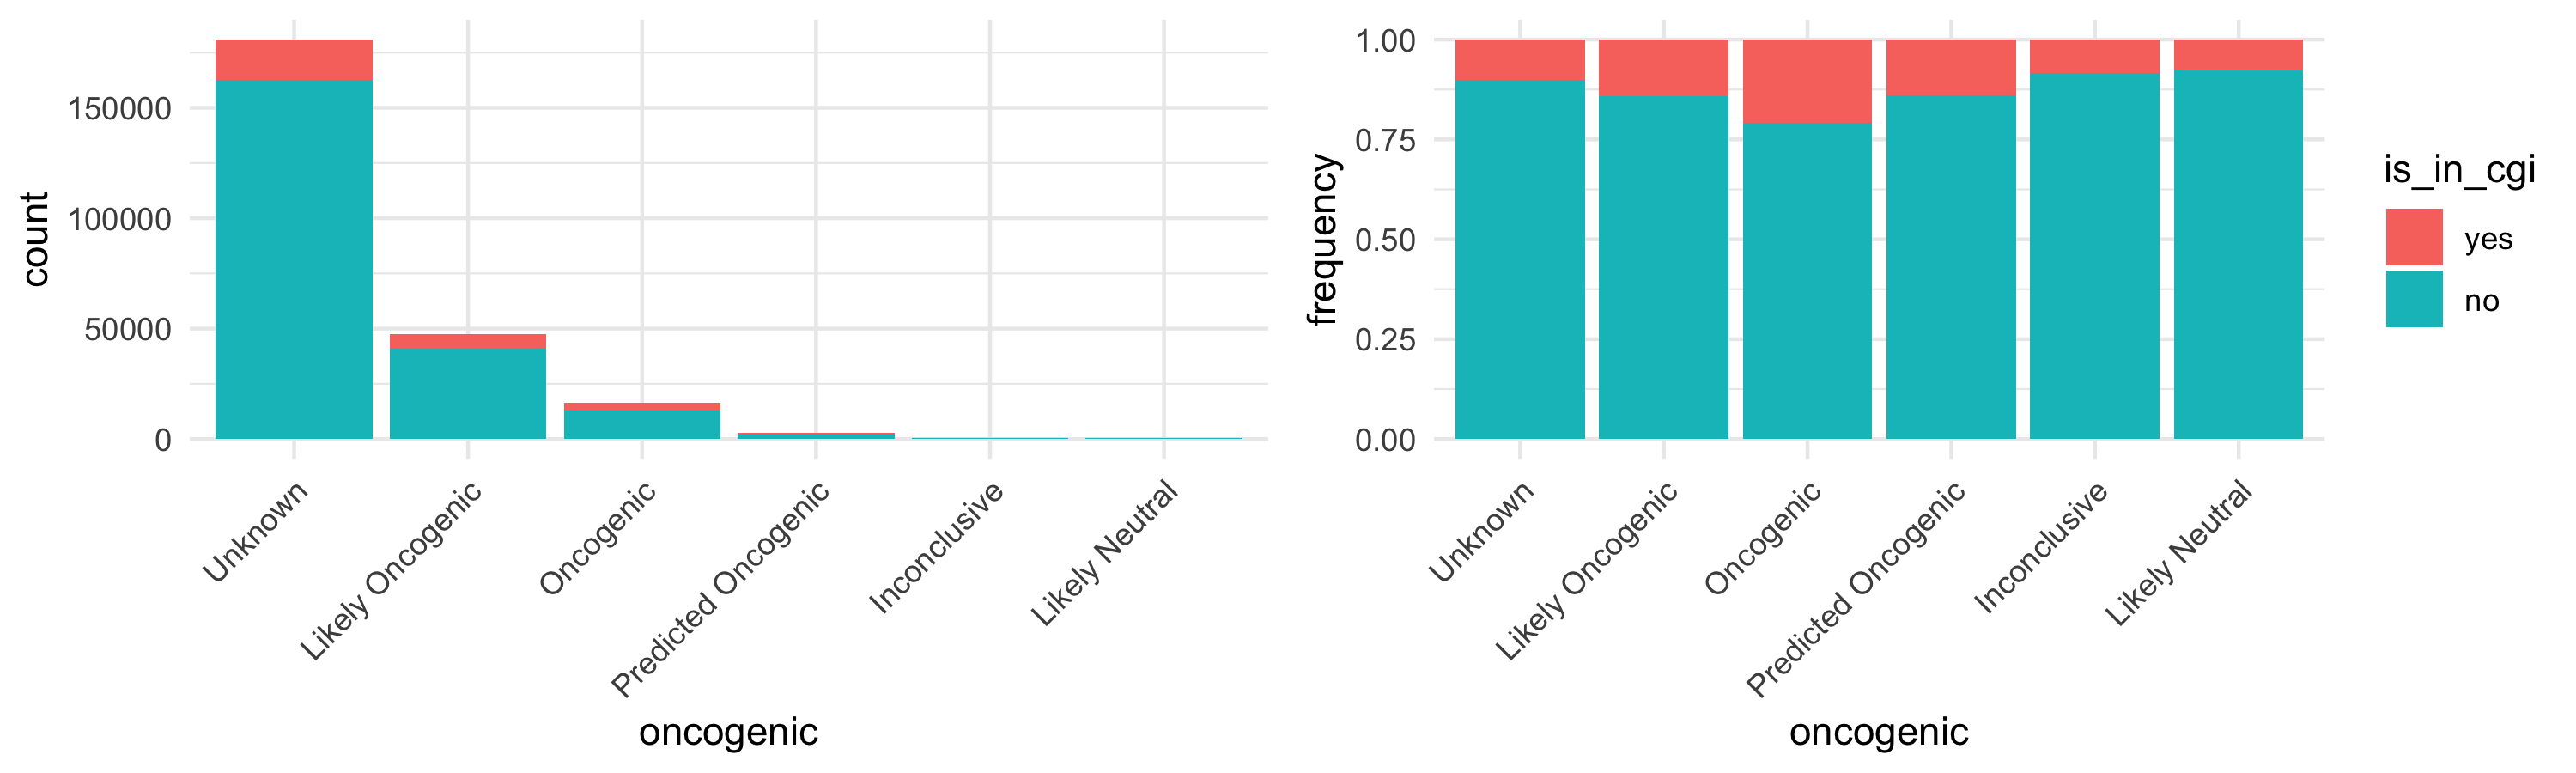

In [99]:
plot_contingency_table_as_histograms(impact, "oncogenic", "is_in_cgi")

## My Cancer Genome

**Website:** https://www.mycancergenome.org  
**Article:** DIRECT paper at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4121886/, published in Clin Cancer Res. in April 2013. DIRECT stands for 'DNA-mutation Inventory to Refine and Enhance Cancer Treatment', it contains information about the potential clinical significance of specific tumor mutations (it is the database on which MyCancerGenome is running?).  
**Author:** Vanderbilt-Ingram Cancer Center  
**Data:** not public

*Pierre - "It's an old OncoKB."*

From the article and https://www.mycancergenome.org/about/direct/:
* My Cancer Genome is a precision cancer medicine knowledge resource for physicians, patients, caregivers and researchers. It gives information on what mutations make cancers grow and related therapeutic implications, including available clinical trials.
* Focused on "patient focus content".
* A database (DIRECT) has been established, it contains information about the potential clinical significance of specific tumor mutations.
* To compile the information in DIRECT, the PCMI team used a retrospective PubMed medical subject heading (MeSH) search to identify patient-level, mutation-specific, drug response data from different studies in NSCLC.
* The initial goal of the DIRECT database was to catalogue clinically relevant somatic mutations in lung cancer. The project began by cataloguing data from patients with EGFR mutations but will be expanding to incorporate data on all known mutations with potential clinical significance in various types of cancer. 
* Not sure if DIRECT is the only database, the website says "Currently, DIRECT catalogues drug response data from patients with non-small cell lung cancer (NSCLC) whose tumors harbor mutations in EGFR", but maybe the website is not up-to-date. Indeed, we can find other cancer type mutations on the website.

## 